In [39]:
import pandas as pd

In [40]:
#Import data
df = pd.read_csv('Downloads/All+course+files/All course files/ChatGPT Section//Motor_Vehicle_Collisions_-_Crashes.csv') 

In [41]:
# Display the first 5 rows
df.head()

,CRASH DATE,CRASH TIME,BOROUGH,ZIP CODE,LATITUDE,LONGITUDE,LOCATION,ON STREET NAME,CROSS STREET NAME,OFF STREET NAME,...,CONTRIBUTING FACTOR VEHICLE 2,CONTRIBUTING FACTOR VEHICLE 3,CONTRIBUTING FACTOR VEHICLE 4,CONTRIBUTING FACTOR VEHICLE 5,COLLISION_ID,VEHICLE TYPE CODE 1,VEHICLE TYPE CODE 2,VEHICLE TYPE CODE 3,VEHICLE TYPE CODE 4,VEHICLE TYPE CODE 5
0,11/09/2021,2:39,NaN,NaN,NaN,NaN,NaN,WHITESTONE EXPRESSWAY,20 AVENUE,NaN,...,Unspecified,NaN,NaN,NaN,4455765,Sedan,Sedan,NaN,NaN,NaN
1,26/03/2022,11:45,NaN,NaN,NaN,NaN,NaN,QUEENSBORO BRIDGE UPPER,NaN,NaN,...,NaN,NaN,NaN,NaN,4513547,Sedan,NaN,NaN,NaN,NaN
2,29/06/2022,6:55,NaN,NaN,NaN,NaN,NaN,THROGS NECK BRIDGE,NaN,NaN,...,Unspecified,NaN,NaN,NaN,4541903,Sedan,Pick-up Truck,NaN,NaN,NaN
3,11/09/2021,9:35,BROOKLYN,11208.0,40.667202,-73.866500,"(40.667202, -73.8665)",NaN,NaN,1211 LORING AVENUE,...,NaN,NaN,NaN,NaN,4456314,Sedan,NaN,NaN,NaN,NaN
4,14/12/2021,8:13,BROOKLYN,11233.0,40.683304,-73.917274,"(40.683304, -73.917274)",SARATOGA AVENUE,DECATUR STREET,NaN,...,NaN,NaN,NaN,NaN,4486609,NaN,NaN,NaN,NaN,NaN


### Explore the Data

In [43]:
# Get basic info about the dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 179921 entries, 0 to 179920
Data columns (total 29 columns):
 #   Column                         Non-Null Count   Dtype  
---  ------                         --------------   -----  
 0   CRASH DATE                     179921 non-null  object 
 1   CRASH TIME                     179921 non-null  object 
 2   BOROUGH                        118160 non-null  object 
 3   ZIP CODE                       118137 non-null  float64
 4   LATITUDE                       164788 non-null  float64
 5   LONGITUDE                      164788 non-null  float64
 6   LOCATION                       164788 non-null  object 
 7   ON STREET NAME                 130909 non-null  object 
 8   CROSS STREET NAME              83247 non-null   object 
 9   OFF STREET NAME                49010 non-null   object 
 10  NUMBER OF PERSONS INJURED      179920 non-null  float64
 11  NUMBER OF PERSONS KILLED       179921 non-null  int64  
 12  NUMBER OF PEDESTRIANS INJURED 

In [44]:
import pandas as pd

# Convert 'CRASH DATE' and 'CRASH TIME' to datetime
df['CRASH DATE'] = pd.to_datetime(df['CRASH DATE'], dayfirst=True)
df['CRASH TIME'] = pd.to_datetime(df['CRASH TIME'], format='%H:%M').dt.time  # Keep only time

# Combine 'CRASH DATE' and 'CRASH TIME' into a single datetime column
df['CRASH DATETIME'] = pd.to_datetime(df['CRASH DATE'].astype(str) + ' ' + df['CRASH TIME'].astype(str))

# Convert 'ZIP CODE' to string (handling NaN values properly)
df['ZIP CODE'] = df['ZIP CODE'].fillna('').astype(str)

# Extract useful time-based features
df['DAY OF WEEK'] = df['CRASH DATETIME'].dt.dayofweek  # 0=Monday, 6=Sunday
df['MONTH'] = df['CRASH DATETIME'].dt.month
df['YEAR'] = df['CRASH DATETIME'].dt.year
df['HOUR'] = df['CRASH DATETIME'].dt.hour

# Create 'DAY/NIGHT' column based on time of crash
df['DAY/NIGHT'] = df['HOUR'].apply(lambda x: 'Day' if 6 <= x < 18 else 'Night')

In [45]:
df = df.drop(columns=[
    'VEHICLE TYPE CODE 3',  
    'VEHICLE TYPE CODE 4',  
    'VEHICLE TYPE CODE 5',
    'CONTRIBUTING FACTOR VEHICLE 3',  
    'CONTRIBUTING FACTOR VEHICLE 4',  
    'CONTRIBUTING FACTOR VEHICLE 5'  
])


In [46]:
# Remove duplicates
df.drop_duplicates(inplace = True)

In [65]:
# Displaying all columns and their values for the first record
first_record = df.iloc[0]
print(first_record)

CRASH DATE                                2021-09-11 00:00:00
CRASH TIME                                           02:39:00
BOROUGH                                                   NaN
ZIP CODE                                                     
LATITUDE                                                  NaN
LONGITUDE                                                 NaN
LOCATION                                                  NaN
ON STREET NAME                          WHITESTONE EXPRESSWAY
CROSS STREET NAME                                   20 AVENUE
OFF STREET NAME                                           NaN
NUMBER OF PERSONS INJURED                                 2.0
NUMBER OF PERSONS KILLED                                    0
NUMBER OF PEDESTRIANS INJURED                               0
NUMBER OF PEDESTRIANS KILLED                                0
NUMBER OF CYCLIST INJURED                                   0
NUMBER OF CYCLIST KILLED                                    0
NUMBER O

<Axes: title={'center': 'Crashes Per Day of the Week'}, xlabel='DAY OF WEEK'>

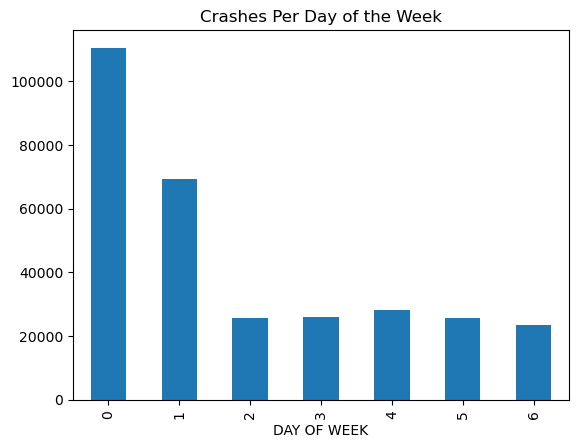

In [67]:
#Temporal Analysis
#Crash Frequency by Year, Month, and Day of the Week
#Find trends in crashes over time. Are they increasing or decreasing?
#Identify the months and days with the highest number of crashes.

df.groupby('YEAR').size().plot(kind='bar', title='Crashes Per Year')
df.groupby('MONTH').size().plot(kind='bar', title='Crashes Per Month')
df.groupby('DAY OF WEEK').size().plot(kind='bar', title='Crashes Per Day of the Week')

<Axes: title={'center': 'Crashes Per Hour'}, xlabel='HOUR'>

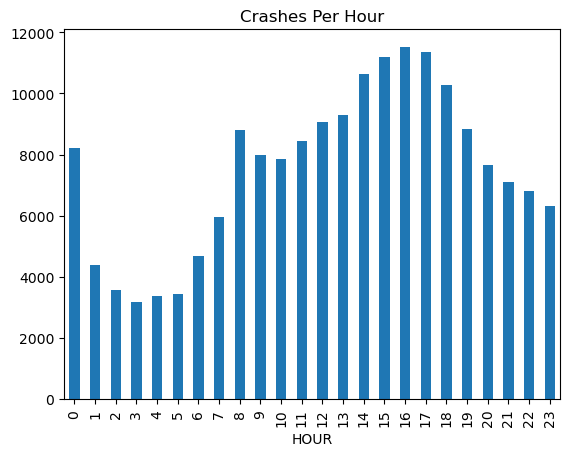

In [71]:
#Hourly Crash Trends
#When do most accidents happen?
#Are there peak accident hours?

df.groupby('HOUR').size().plot(kind='bar', title='Crashes Per Hour')

<Axes: title={'center': 'Day vs. Night Crashes'}, xlabel='DAY/NIGHT'>

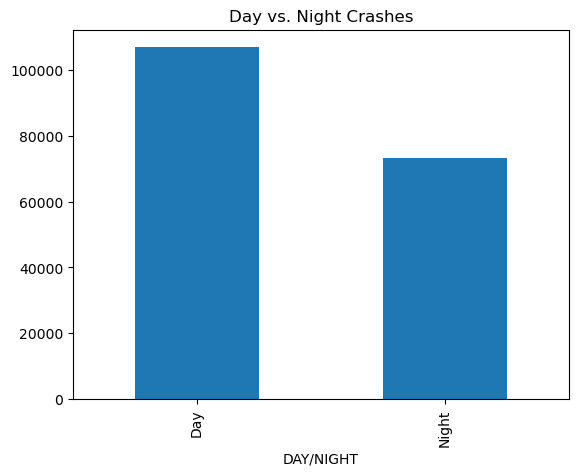

In [73]:
df['DAY/NIGHT'].value_counts().plot(kind='bar', title='Day vs. Night Crashes')